# Cost-Sensitive
Besides tuning the thresholds of our classifier, there are other approaches you can take to aid with uneven clasification costs. There are many ways to include the cost information in classification algorithms. For example in naive Bayes, you could predict the class with the lowest expected cost instead of the class with the highest probability.

Another way to tune classifieres is to alter the data used to train the classifier to deal with imbalanced classification tasks. This is done by either undersampling or oversampling data. **Oversample** means to duplicate examples, wheresas **undersample** means delete examples. The sampling can be done either randomply or in a predeterminated fashion. For example, one approach would be to keep all of the examples from the positive class and undersample or discard examples from the negative class. One drawback of this approach is deciding which negative examples to toss out. The examples you choose to toss out could carry valuable information that isn't contained in the remaining examples.

To oversample the positive class, you could replicate the existing examples or add new points similar to the existing points. One approach is to add a data point **interpolated** between existing data points. This process can lead to **overfitting**.

Most learning schemes do not perform cost-sensitive learning: They generate the same classifier no matter what costs are assigned to the different classes.
**Simple methods for cost-sensitive learning**
* For any classifier:
    - Resampling of instances according to costs
    - proportion of instances with higher weights will be increased
* If classifier is able to handle weighted instances
    - weighting of instances according to costs
    - covered examples are not counted with 1, but with their weight
* If classifier returns a score *f* or a probability *p*
    - varying the classification threshold

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

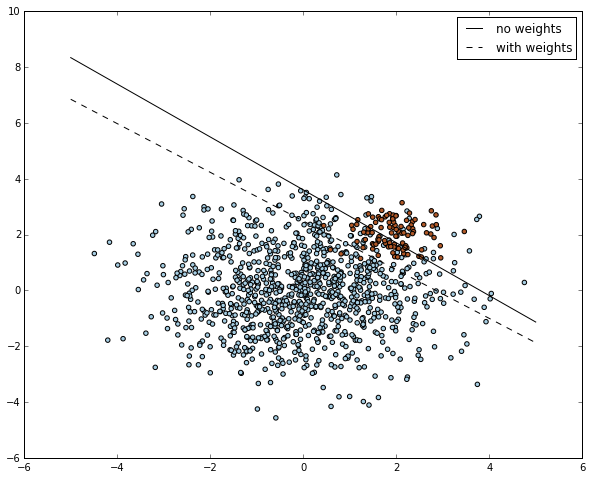

In [10]:
# We create 40 separable points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
         0.5 * rng.randn(n_samples_2, 2) + [2,2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel = 'linear', C = 1.0)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5,5)
yy = a * xx - clf.intercept_[0] / w[1]

# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel = 'linear', class_weight={1:10})
wclf.fit(X,y)

ww = wclf.coef_[0]
wa = -ww[0]/ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]
plt.figure(figsize=(10,8))
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='with weights')
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.legend()

In [11]:
print X

[[ 2.64607852  0.60023581]
 [ 1.46810698  3.3613398 ]
 [ 2.80133699 -1.46591682]
 ..., 
 [ 1.68550965  2.53503626]
 [ 1.68945865  2.86728609]
 [ 1.45085528  2.28630668]]


## Expected Value

The expected value computation provides a framework that is extremely useful in organizing thinking about data-analytic problems. Specifically, it decomposes data-analytic thinking into:
1. The structure of the problem
2. The elements of the analysis that can be extracted from data
3. The elements of the analysis that need to be acuired from other data sources

The expected value is then the weighted average of the values of the different possible outcomes, where the weight given to each value it its probability of occurrence:
$$EV=\sum\limits_{i=1}^n p(o_{i})* v(o_{i})$$

The probabilities often can be estimated form data, but business values often need to be acquired from other sources.

Instead of computing accuracies for the competing models, we would compute expected values. In many data mining studies, the focus is on minimizing cost rather than maximizing profit, so the signs are reversed. Mathematically, there is no difference. However, it is important to pick one view and be consistent. An easy mistake in formulating const-benefit matrices is to **"double count"** by putting a benefit in one cell and a negative cost for the same thing in another cell. **One should be zero**